<a href="https://colab.research.google.com/github/hillahalevi/Airport_data_base/blob/master/r_place_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install praw
import matplotlib
from matplotlib import pyplot as plt
from google.colab import drive


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/research_data/tiles_with_explicit_user_names.csv"
df = pd.read_csv(path)
# Dataset is now stored in a Pandas Dataframe

In [ ]:
import pandas as pd

rplace_path = "/content/drive/MyDrive/research_data/clean_df_with_engagement_data.csv"
rplace_df = pd.read_csv(rplace_path)
rplace_df.head()

,Unnamed: 0,ts,user,x_coordinate,y_coordinate,color,original_username,time_diff,engagement_level
0,0,1491167838000,c2Md9m4QckH8M+lhNh9btgoiFDk=,326,258,0,bolush_it,3689000.0,0.170597
1,61865,1491136027000,c2Md9m4QckH8M+lhNh9btgoiFDk=,66,993,0,bolush_it,34309000.0,0.170597
2,131725,1491010730000,c2Md9m4QckH8M+lhNh9btgoiFDk=,631,113,0,bolush_it,6423000.0,0.170597
3,531920,1491097193000,c2Md9m4QckH8M+lhNh9btgoiFDk=,851,30,4,bolush_it,308000.0,0.170597
4,636420,1491055635000,c2Md9m4QckH8M+lhNh9btgoiFDk=,308,259,5,bolush_it,762000.0,0.170597


In [ ]:
r_users_path = "/content/reddit_user_data.csv"
r_users_df = pd.read_csv(r_users_path)
r_users_df.head()

,id,name,created_utc,comment_karma,link_karma,subreddits,num_posts
0,y17oo,-NVLL-,1.463604e+09,8144.0,911.0,"{'pcmasterrace', 'techsupport', 'outwardgame',...",9055.0
1,3kcgj,FrenchGrammarNazi,1.248784e+09,3012.0,1.0,set(),3013.0
2,5ak1x,pconwell,1.306471e+09,89286.0,16506.0,"{'learnmath', 'retirement', 'DataHoarder', 'gr...",105792.0
3,37jrc,loulan,1.217644e+09,659781.0,1542163.0,"{'listentothis', 'TheNational', 'UkrainianConf...",2201944.0
4,q0fbq,yangok,1.441046e+09,1352.0,155.0,{'Shrek'},1507.0


In [ ]:
# assume df1 is the smaller data frame with 1000 rows and df2 is the larger data frame with 50000 rows
merged_df = pd.merge(r_users_df, rplace_df, left_on='name', right_on='original_username')

In [ ]:
merged_df.head()

,id,name,created_utc,comment_karma,link_karma,subreddits,num_posts,Unnamed: 0,ts,user,x_coordinate,y_coordinate,color,original_username,time_diff,engagement_level
0,y17oo,-NVLL-,1.463604e+09,8144.0,911.0,"{'pcmasterrace', 'techsupport', 'outwardgame',...",9055.0,1996,1491152722000,OBGjEkRD09yu5Uw0FgQQnFNjeyY=,611,127,0,-NVLL-,0.0,0.947775
1,y17oo,-NVLL-,1.463604e+09,8144.0,911.0,"{'pcmasterrace', 'techsupport', 'outwardgame',...",9055.0,15675,1491090340000,OBGjEkRD09yu5Uw0FgQQnFNjeyY=,593,145,0,-NVLL-,666000.0,0.947775
2,y17oo,-NVLL-,1.463604e+09,8144.0,911.0,"{'pcmasterrace', 'techsupport', 'outwardgame',...",9055.0,52277,1491153357000,OBGjEkRD09yu5Uw0FgQQnFNjeyY=,604,117,0,-NVLL-,0.0,0.947775
3,y17oo,-NVLL-,1.463604e+09,8144.0,911.0,"{'pcmasterrace', 'techsupport', 'outwardgame',...",9055.0,75288,1491150805000,OBGjEkRD09yu5Uw0FgQQnFNjeyY=,583,117,0,-NVLL-,0.0,0.947775
4,y17oo,-NVLL-,1.463604e+09,8144.0,911.0,"{'pcmasterrace', 'techsupport', 'outwardgame',...",9055.0,80588,1491085348000,OBGjEkRD09yu5Uw0FgQQnFNjeyY=,585,121,0,-NVLL-,410000.0,0.947775


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import numpy as np
# encode the categorical features using one-hot encoding
encoder = OneHotEncoder()
categorical_columns = ["subreddits"]
encoded = encoder.fit_transform(merged_df[categorical_columns]).toarray()
encoded_columns = encoder.get_feature_names(categorical_columns)
encoded_df = pd.DataFrame(encoded, columns=encoded_columns)

# combine the encoded features with the original data frame
merged_df = pd.concat([merged_df, encoded_df], axis=1)
merged_df.drop(columns=categorical_columns, inplace=True)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
merged_df.to_csv('merged_df.csv', index=False)


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

merged_df = pd.read_csv("merged_df.csv")
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(merged_df.drop(columns=["engagement_level"]), merged_df["engagement_level"], test_size=0.2, random_state=42)

# train a random forest regressor on the training set
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# evaluate the model on the testing set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

# plot the feature importances
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(10, 6))
feature_importances.plot(kind="bar")
plt.title("Feature importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
#merged_df = pd.read_csv("engagement_data.csv")

# Define the independent variables (features)
X = merged_df.drop("engagement_level", axis=1)

# Define the dependent variable (target)
y = merged_df["engagement_level"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train a decision tree classifier on the training data
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get the feature importances
importances = clf.feature_importances_


# Create a bar plot of the feature importances
plt.bar(X.columns, importances)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

ValueError: ignored

In [ ]:
# group the data frame by the original_username column
grouped = df.groupby('original_username')

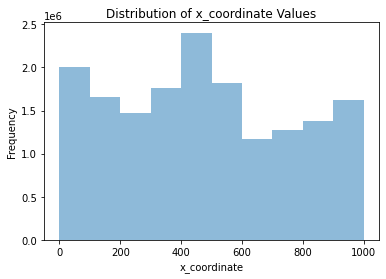

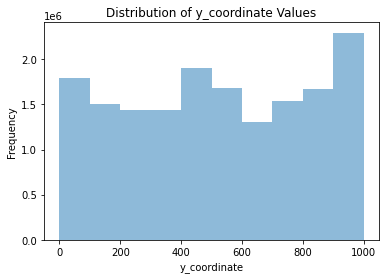

In [ ]:
# plot the distribution of x_coordinate values
plt.hist(df['x_coordinate'], bins=10, alpha=0.5)
plt.xlabel('x_coordinate')
plt.ylabel('Frequency')
plt.title('Distribution of x_coordinate Values')
plt.show()

# plot the distribution of y_coordinate values
plt.hist(df['y_coordinate'], bins=10, alpha=0.5)
plt.xlabel('y_coordinate')
plt.ylabel('Frequency')
plt.title('Distribution of y_coordinate Values')
plt.show()


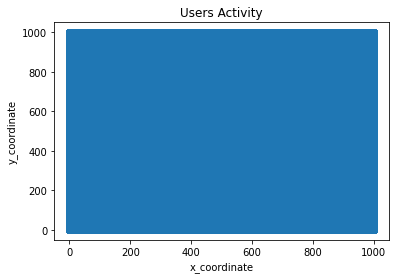

In [ ]:
# plot the users' activity - to big need to sample 
plt.scatter(df['x_coordinate'], df['y_coordinate'])
plt.xlabel('x_coordinate')
plt.ylabel('y_coordinate')
plt.title('Users Activity')
plt.show()

In [ ]:
import pandas as pd

def preprocess_data(df):
    # convert the ts column to a datetime format
    df['ts'] = pd.to_datetime(df['ts'], unit='ms')
    return df

def find_most_active_time_period(group):
    # calculate the number of entries for each hour
    hour_counts = group['ts'].dt.hour.value_counts()
    # return the hour with the most entries
    return hour_counts.index[0]

In [ ]:
def analyze_data(df):
    # calculate the most active time period for each user
    most_active_period = grouped.apply(find_most_active_time_period).reset_index(name='most_active_hour')
    most_active_period.to_csv('most_active_period.csv', index=False)
    
    # calculate the average x and y coordinates for each user
    avg_coordinates = grouped[['x_coordinate', 'y_coordinate']].mean().reset_index()
    avg_coordinates.to_csv('avg_coordinates.csv', index=False)
    
    # calculate the most frequent color for each user
    most_frequent_color = grouped['color'].agg(lambda x: x.value_counts().index[0]).reset_index(name='most_frequent_color')
    most_frequent_color.to_csv('most_frequent_color.csv', index=False)
    
    # count the number of rows for each original_username
    row_counts = df['original_username'].value_counts().reset_index(name='row_count')
    row_counts.to_csv('row_counts.csv', index=False)


# preprocess the data
df = preprocess_data(df)

# perform the analysis
analyze_data(df)


Sampling version :

In [ ]:
import pandas as pd
import random

def preprocess_data(df):
    # convert the ts column to a datetime format
    df['ts'] = pd.to_datetime(df['ts'], unit='ms')
    return df

def find_most_active_time_period(group):
    # calculate the number of entries for each hour
    hour_counts = group['ts'].dt.hour.value_counts()
    # return the hour with the most entries
    return hour_counts.index[0]

def analyze_data(df):
    grouped = df.groupby('original_username')

    # sample the data to reduce the noise
    sample = grouped.apply(lambda x: x.sample(frac=0.1, random_state=42))
    
    # calculate the most active time period for each user
    most_active_period = sample.groupby('original_username').apply(find_most_active_time_period).reset_index(name='most_active_hour')
    most_active_period.to_csv('s_most_active_period.csv', index=False)
    
    # calculate the average x and y coordinates for each user
    avg_coordinates = sample[['x_coordinate', 'y_coordinate']].mean().reset_index()
    avg_coordinates.to_csv('s_avg_coordinates.csv', index=False)
    
    # calculate the most frequent color for each user
    most_frequent_color = sample['color'].agg(lambda x: x.value_counts().index[0]).reset_index(name='most_frequent_color')
    most_frequent_color.to_csv('s_most_frequent_color.csv', index=False)
    
    # count the number of rows for each original_username
    row_counts = sample['original_username'].value_counts().reset_index(name='row_count')
    row_counts.to_csv('s_row_counts.csv', index=False)



# preprocess the data
df = preprocess_data(df)

# perform the analysis
analyze_data(df)


Identify key users :

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Convert the timestamp column to a datetime object
df['ts'] = pd.to_datetime(df['ts'], unit='ms')

# Plot the distribution of contributions over time
grouped = df.groupby(['original_username'])['ts'].count().reset_index(name='counts')
grouped = grouped.sort_values('counts', ascending=False).head(10)
grouped_df = df[df['original_username'].isin(grouped['original_username'])]
g = sns.lineplot(x='ts', y='original_username', data=grouped_df, estimator=None, color='gray', linewidth=0.5)
g.set_xticks(np.arange(grouped_df['ts'].min(), grouped_df['ts'].max(), np.timedelta64(24,'h')))
plt.xticks(rotation=45)
plt.title('Distribution of Contributions Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Username')
plt.tight_layout()
plt.savefig('contributions_over_time.png')

# Map the contributions
colors = sns.color_palette('husl', n_colors=grouped_df['original_username'].nunique())
color_dict = dict(zip(grouped_df['original_username'].unique(), colors))
grouped_df['color'] = grouped_df['original_username'].map(color_dict)
plt.figure(figsize=(20,10))
plt.scatter(grouped_df['x_coordinate'], grouped_df['y_coordinate'], c=grouped_df['color'], alpha=0.5, linewidth=0)
plt.title('Map of Contributions')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.tight_layout()
plt.savefig('map_of_contributions.png')

# Study the impact of user behavior
grouped_df['hour_of_day'] = grouped_df['ts'].dt.hour
g = sns.countplot(x='hour_of_day', hue='original_username', data=grouped_df)
plt.title('Impact of User Behavior')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('impact_of_user_behavior.png')


Key users with sampling - needs fix:

In [ ]:
df = df[df.original_username!= '###']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


# Convert the "ts" column to a datetime format
df["ts"] = pd.to_datetime(df["ts"], unit='ms')

# Group the data by original_username
grouped_df = df.groupby("original_username")

# Count the number of rows for each original_username
counts = grouped_df.size().reset_index(name="counts")

# Sort the counts in descending order
counts = counts.sort_values("counts", ascending=False)

# Plot the histogram of counts
plt.hist(counts["counts"], bins=50)
plt.xlabel("Counts")
plt.ylabel("Frequency")
plt.title("Histogram of counts by original_username")
plt.show()

# Get the top 10 original_usernames
top_10 = counts["original_username"][:10]

# Filter the data to only include the top 10 original_usernames
filtered_df = df[df["original_username"].isin(top_10)]

# Apply PCA to reduce the dimensions of the data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(filtered_df[["x_coordinate", "y_coordinate"]])

# Plot the results of PCA
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=filtered_df["color"], alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA results for top 10 original_usernames")
plt.show()

# Apply t-SNE to further reduce the dimensions of the data
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_result = tsne.fit_transform(pca_result)

# Plot the results of t-SNE
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=filtered_df["color"], alpha=0.5)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE results for top 10 original_usernames")
plt.show()


In [ ]:
df['pixel'] = list(zip(df.x_coordinate, df.y_coordinate))


In [ ]:
# group the data frame by the original_username column
grouped = df.groupby('original_username')

# count the number of rows for each group
result = grouped.size().reset_index(name='counts')

# sort the result by the counts column in descending order
result = result.sort_values(by='counts', ascending=False)

# get a list of original_username sorted by the number of rows they had
usernames = list(result['original_username'])

# print the result
print(usernames)

In [ ]:
# group the data frame by the original_username column
grouped = df.groupby('original_username')

# count the number of rows for each group
result = grouped.size().reset_index(name='counts')

# sort the result by the counts column in descending order
result = result.sort_values(by='counts', ascending=False)

# get a list of original_username sorted by the number of rows they had
usernames = list(result['original_username'])


In [ ]:
import praw
import pandas as pd

def fetch_user_data(reddit, user_ids):
    user_data = []
    for user_id in user_ids:
        try:
            user = reddit.redditor(user_id)
            data = {
                'id': user.id,
                'name': user.name,
                'created_utc': user.created_utc,
                'comment_karma': user.comment_karma,
                'link_karma': user.link_karma,
                'subreddits': set(submission.subreddit.display_name for submission in user.submissions.new(limit=None)),
                'num_posts': user.link_karma + user.comment_karma
            }
            user_data.append(data)
        except Exception as e:
            print(f"Error fetching user data for {user_id}: {e}")
    return user_data



In [ ]:
def main():
  reddit = praw.Reddit(client_id='FnSwswueosOi_g',
                         client_secret='kcUc1ZMxUDLHgO4gzdFCdca79xk',
                         password='gefenp4',
                         user_agent='Avrahami_crawling_data',
                         username='avrahami_isr')
  user_ids = usernames[:5] # List of Reddit user IDs
  user_data = fetch_user_data(reddit, user_ids)
  df = pd.DataFrame(user_data)
  df.to_csv('reddit_user_data.csv', index=False)

if __name__ == '__main__':
    main()

In [ ]:
len(usernames)

837642

In [ ]:
import praw
import pandas as pd

# # Replace <client_id> and <client_secret> with your own credentials
# reddit = praw.Reddit(client_id='<client_id>', client_secret='<client_secret>',
#                      user_agent='<client_id>:<client_secret> (by /u/<reddit_username>)',
#                      access_token='<access_token>')

reddit = praw.Reddit(client_id='FnSwswueosOi_g',
                         client_secret='kcUc1ZMxUDLHgO4gzdFCdca79xk',
                         password='gefenp4',
                         user_agent='Avrahami_crawling_data',
                         username='avrahami_isr')

In [ ]:
num_posts = user.link_karma + user.comment_karma
likes = user.link_karma
comments = user.comment_karma
#my_subs = [subreddit.display_name for subreddit in user.subreddit(limit=None)]
vars(user.subreddit)
#vars(user)

general engagment_data calc based on multiple features

In [ ]:
import pandas as pd

# Load the data into a pandas DataFrame
df = pd.read_csv("r_place_data.csv")

# Create a new column for engagement level
df["engagement_level"] = df["squares_claimed"] + df["frequency_of_claims"] + df["time_spent"] + df["interactions_with_other_users"]

# Normalize the engagement level values
df["engagement_level"] = (df["engagement_level"] - df["engagement_level"].min()) / (df["engagement_level"].max() - df["engagement_level"].min())

# Save the updated data to a new CSV file
df.to_csv("engagement_data.csv", index=False)

 engagment_data calc based on Time spent on the experiment:

---



In [ ]:
import pandas as pd

# Load the data into a pandas DataFrame
df = pd.read_csv("r_place_data.csv")

# Calculate the total time spent on the experiment for each user
df["engagement_level"] = df["time_spent"]

# Normalize the engagement level values
df["engagement_level"] = (df["engagement_level"] - df["engagement_level"].min()) / (df["engagement_level"].max() - df["engagement_level"].min())

# Save the updated data to a new CSV file
df.to_csv("engagement_data.csv", index=False)

 engagment_data calc based on Number of squares claimed:

```
# This is formatted as code
```




In [ ]:
import pandas as pd

# Load the data into a pandas DataFrame
df = pd.read_csv("r_place_data.csv")

# Calculate the total number of squares claimed for each user
df["engagement_level"] = df["squares_claimed"]

# Normalize the engagement level values
df["engagement_level"] = (df["engagement_level"] - df["engagement_level"].min()) / (df["engagement_level"].max() - df["engagement_level"].min())

# Save the updated data to a new CSV file
df.to_csv("engagement_data.csv", index=False)

 engagment_data calc based on Interactions with other users:

---




In [ ]:
import pandas as pd

# Load the data into a pandas DataFrame
df = pd.read_csv("r_place_data.csv")

# Calculate the total number of interactions with other users for each user
df["engagement_level"] = df["interactions_with_other_users"]

# Normalize the engagement level values
df["engagement_level"] = (df["engagement_level"] - df["engagement_level"].min()) / (df["engagement_level"].max() - df["engagement_level"].min())

# Save the updated data to a new CSV file
df.to_csv("engagement_data.csv", index=False)

 engagment_data calc based on Frequency of claiming squares:


In [ ]:
import pandas as pd

# Load the data into a pandas DataFrame
df = pd.read_csv("r_place_data.csv")

# Calculate the average time between each square claim for each user
df["engagement_level"] = df["frequency_of_claims"]

# Normalize the engagement level values
df["engagement_level"] = (df["engagement_level"] - df["engagement_level"].min()) / (df["engagement_level"].max() - df["engagement_level"].min())

# Save the updated data to a new CSV file
df.to_csv("engagement_data.csv", index=False)

calculates engagement level as the ratio of pixels placed to time spent

In [ ]:
import pandas as pd

# Load the data into a pandas DataFrame
df = pd.read_csv("r_place_data.csv")

# Calculate the number of pixels a user placed
df['pixels_placed'] = df.groupby('user_id')['timestamp'].count()

# Calculate the total time a user spent on the platform
df['time_spent'] = df.groupby('user_id')['timestamp'].max() - df.groupby('user_id')['timestamp'].min()

# Calculate the engagement level as the ratio of pixels placed to time spent
df['engagement_level'] = df['pixels_placed'] / df['time_spent']

# View the resulting engagement levels for each user
print(df.groupby('user_id')['engagement_level'].mean())

In [ ]:
# to add community activity

building a predictive model for user engagement level in Python using a decision tree algorithm from the scikit-learn library :


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
df = pd.read_csv("engagement_data.csv")

# Define the independent variables (features)
X = df.drop("engagement_level", axis=1)

# Define the dependent variable (target)
y = df["engagement_level"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train a decision tree classifier on the training data
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get the feature importances
importances = clf.feature_importances_

# Create a bar plot of the feature importances
plt.bar(X.columns, importances)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()